### Задача 1:

Для функции f(x) найти точку локального минимума, пользуясь
указанными методами. Сравнить эффективность методов (например, количество
вычислений функции или производных для достижения заданной точности). Если
локальных минимумов несколько, достаточно найти только один из них. Первоначальный
отрезок локализации минимума можно находить с помощью метода равномерного поиска
или графического метода. Для контроля правильности реализации методов, используйте
встроенные функции из библиотеки scipy.

Функция: $f(x)=2x^2-ln(x)$  
Методы : Метод деления интервала пополам, Метод Ньютона
### Решение:

Для начала необходимо определить первоначальный отрезок локализации минимума. Построим график функции и определим графически

### Визуализация функции на языке Python:

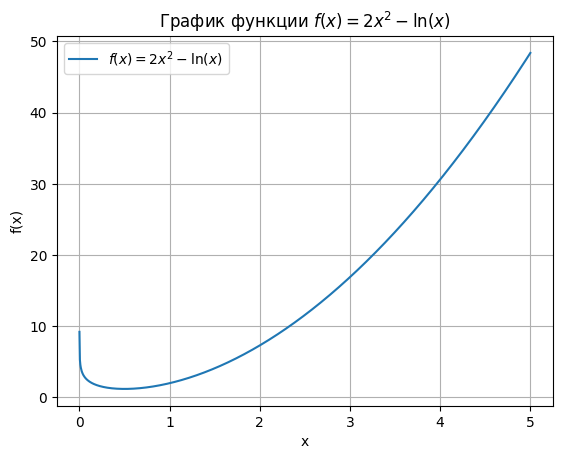

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return 2*x**2 - np.log(x)
    
if __name__ == "__main__":
    x_values = np.linspace(0.0001, 5, 1000)
    y_values = f(x_values)
    
    plt.plot(x_values, y_values, label='$f(x)=2x^2 - \ln(x)$')
    plt.title('График функции $f(x)=2x^2 - \ln(x)$')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.show()
    

Очевидно, что локальный минимум будет находиться на отрезке [0.0001, 1].

### Решение задачи методом деления интервала пополам на языке Python:

In [11]:
from scipy.optimize import minimize_scalar


def f(x):
    return 2 * x**2 - np.log(x)

def bisection(f, a, b, eps):
    iter_counter = 0
    while True:
        iter_counter += 1
        x = (a + b) / 2
        y = a + (b - a) / 4
        z = b - (b - a) / 4

        x_value = f(x)
        y_value = f(y)
        z_value = f(z)

        if y_value < x_value:
            b = x
            x = y
        elif z_value < x_value:
            a = x
            x = z
        elif z_value >= x_value:
            a = y
            b = z
            
        if (b - a) <= eps:
            return x, iter_counter


minimum_func, iter_counter = bisection(f, 0.0001, 1, 1e-9)
minimum_scipy = minimize_scalar(f, tol=1e-9)

print(f"Точка локального минимума bisection: {minimum_func}, число итераций: {iter_counter}")
print(f"Точка локального минимума minimize: {minimum_scipy.x}, число итераций: {minimum_scipy.nit}")

Точка локального минимума bisection: 0.499999996703863, число итераций: 30
Точка локального минимума minimize: 0.49999999819065605, число итераций: 18


C:\Users\whatislove\AppData\Local\Temp\ipykernel_11776\2310841501.py:5: RuntimeWarning: divide by zero encountered in log
  return 2 * x**2 - np.log(x)


### Решение задачи методом Ньютона на языке Python:

In [24]:
from scipy.optimize import minimize

def diff_f(x):
    return 4 * x - 1 / x

def double_diff_f(x):
    return 4 + 1 / (x**2)

def newton(x, eps):
    x0 = x
    iter_counter = 0
    while True:
        iter_counter += 1
        xk = x0 - diff_f(x0) / double_diff_f(x0)
        # xk = x0 - x0 * (-1 + 4 * x0**2) / (x0 + 4 * x0**2)
        if abs(x0 - xk) >= eps:
            x0 = xk
        else:
            break
    return xk, iter_counter


minimum_func, iter_counter = newton(0.0001, 1e-9)
minimum_scipy = minimize_scalar(f, tol=1e-9)

print(f"Точка локального минимума newton: {minimum_func}, число итераций: {iter_counter}")
print(f"Точка локального минимума minimize: {minimum_scipy.x}, число итераций: {minimum_scipy.nit}")

Точка локального минимума newton: 0.5, число итераций: 17
Точка локального минимума minimize: 0.49999999819065605, число итераций: 18


C:\Users\whatislove\AppData\Local\Temp\ipykernel_11776\2310841501.py:5: RuntimeWarning: divide by zero encountered in log
  return 2 * x**2 - np.log(x)
